In [2]:
import numpy as np
import random
# import matplotlib.pyplot as plt

# %matplotlib inline
%pylab inline


NumOfIterations = 900

Populating the interactive namespace from numpy and matplotlib


C:\Users\12403\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights_1 = np.random.rand(self.input.shape[1])
        self.bias_1 = np.random.rand(1)
        self.y = y
        self.a1_out = np.zeros([self.input.shape[1],1])
#         self.output = np.zeros(self.y.shape[1]).reshape(-1,1)
        
    def Feedforward(self, X):
        self.a1_out = np.dot(X, self.weights_1) + self.bias_1
#         self.a1_out = self.a1_out.reshape(-1,1)
#         self.a1_out = self.sigmoid(self.z1_out)
        return self.a1_out 
    
#     def sigmoid(self, z):
#         return 1/(1+np.exp(-z))
    
    def cost(self): #self.a, self.y
        C = 0.5*sum((self.y - self.a1_out)**2)
#         C = C/ len(self.input)
        return C
    
    def CalcParameters(self):
        delta = self.y - self.a1_out
        dCdW = np.dot(self.input.T, delta)
        dCdb = np.sum(delta)
        return dCdW, dCdb
    
    def UpdateParameters(self, dCdW, dCdb, alpha):
        self.weights_1 = self.weights_1 + (alpha*dCdW)
        self.bias_1 = self.bias_1 + (alpha*dCdb)

In [4]:
def GenerateTestData(Size):
    x = np.linspace(0, 10, Size).reshape(Size, 1)
    y = np.zeros(Size).reshape(Size,1)
    for n in range(Size):
        y[n] = (2 * x[n]) + 6 #+ (np.random.randn())
    
    return x,y

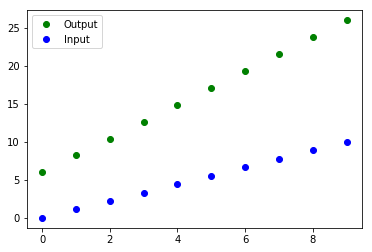

In [5]:
x, y = GenerateTestData(10)
plot(y, 'o', picker = 2, color = "green")
plot(x,'o', picker =2, color = "blue")
legend(['Output','Input'])
# print("x = " + str(x))
# print("y = " + str(y))

In [6]:
NN = NeuralNetwork(x, y)

In [7]:
Output = NN.Feedforward(x)
# Output = Output.reshape(-1,1)
print(y)
# print("Orig. Output " + str(y))

[[ 6.        ]
 [ 8.22222222]
 [10.44444444]
 [12.66666667]
 [14.88888889]
 [17.11111111]
 [19.33333333]
 [21.55555556]
 [23.77777778]
 [26.        ]]


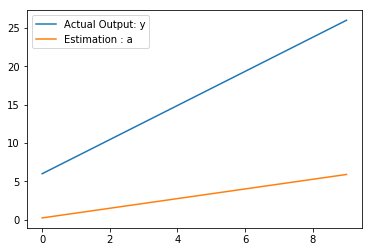

In [8]:
plot(y)
plot(Output)
legend(['Actual Output: y', 'Estimation : a'])

In [9]:
cost = NN.cost()
print(cost)

10558.057222902824


In [10]:
CostTracker = np.zeros(NumOfIterations)
for i in range(NumOfIterations):
    dW, dB = NN.CalcParameters()
# print("dW = " + str(dW))
# print("dB = " + str(dB))
    alpha = 0.00001
    NN.UpdateParameters(dW, dB, alpha)
    Output_new = NN.Feedforward(x)
#     plot(Output)
#     plot(Output_new[5])
#     legend(["Prev Output", "New_Output"])
#     print("New Output = " + str(Output_new))
    CostTracker[i] = NN.cost()


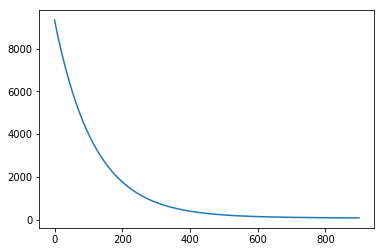

In [11]:
plot(CostTracker)

In [12]:
CostTracker[899]

84.57567494082583

In [13]:
# Output = np.zeros(NumOfIterations)
# C = np.zeros(NumOfIterations)

# for i in range(NumOfIterations):
#     Output = NN.Feedforward()
#     C[i] = NN.cost()
#     print(C[i])
#     NN.UpdateParameters(0.01)
    
    


In [14]:
NN.a1_out.shape

(10, 10)